In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
from scipy.stats import linregress

In [64]:
fp1 = "WHR2015-21.xlsx"
fp3 = "Number without safe drinking water.csv"
fp4 = "water-and-sanitation_percentAccesstoSafeWater.csv"

In [ ]:
#read happiness data
whi_df = pd.read_excel(fp1, header = [0])
whi_df.head()

In [18]:
whi_df['Year'].value_counts()

2015    158
2016    157
2018    156
2019    156
2017    155
2020    153
2021    149
Name: Year, dtype: int64

In [46]:
#read num without safe drinking water 
wosw_df = pd.read_csv(fp3, header = [1])
wosw_df.head()

,Row Labels,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2013,2014,2015,2016,2017,2018,2019,2020,(blank),Grand Total
0,Afghanistan,1.850922e+07,1.924345e+07,1.995075e+07,2.071789e+07,2.143656e+07,2.203515e+07,2.249214e+07,2.273901e+07,2.292012e+07,...,2.527644e+07,2.585455e+07,2.636901e+07,2.681000e+07,2.719163e+07,2.752933e+07,2.784696e+07,2.818842e+07,NaN,5.007040e+08
1,Albania,1.591587e+06,1.593606e+06,1.594830e+06,1.593761e+06,1.530163e+06,1.463817e+06,1.394683e+06,1.323311e+06,1.251264e+06,...,9.158596e+05,8.525783e+05,8.500461e+05,8.481330e+05,8.468802e+05,8.459862e+05,8.450913e+05,8.439282e+05,NaN,2.450158e+07
2,Algeria,9.288298e+06,9.233478e+06,9.176867e+06,9.122057e+06,9.072872e+06,9.032255e+06,9.000871e+06,8.978836e+06,8.966463e+06,...,9.058227e+06,9.352666e+06,9.719710e+06,1.011006e+07,1.052321e+07,1.103013e+07,1.156416e+07,1.211102e+07,NaN,2.012948e+08
3,American Samoa,1.281718e+04,1.226391e+04,1.167365e+04,1.103808e+04,1.035162e+04,9.608535e+03,8.819566e+03,8.000112e+03,7.180782e+03,...,3.556527e+03,2.876786e+03,2.191910e+03,1.503452e+03,9.110216e+02,9.084662e+02,9.060256e+02,9.041419e+02,NaN,1.266980e+05
4,Andorra,6.120504e+03,6.303399e+03,6.556491e+03,6.849651e+03,7.136997e+03,7.382328e+03,7.581131e+03,7.739038e+03,7.849293e+03,...,7.560075e+03,7.414336e+03,7.300146e+03,7.234815e+03,7.206920e+03,7.207948e+03,7.220863e+03,7.232001e+03,NaN,1.532604e+05


In [47]:
wosw_df =wosw_df[['Row Labels','2015','2016','2017', '2018', '2019','2020']]
#unpivot the table 
wosw_df = pd.melt(wosw_df, id_vars = 'Row Labels', value_vars = ['2015','2016','2017', '2018', '2019','2020'], var_name = 'Year')
wosw_df= wosw_df.rename(columns = {'Row Labels':'Country'})
wosw_df.head()


,Country,Year,value
0,Afghanistan,2015,2.636901e+07
1,Albania,2015,8.500461e+05
2,Algeria,2015,9.719710e+06
3,American Samoa,2015,2.191910e+03
4,Andorra,2015,7.300146e+03


In [50]:
wosw_df['Year'] = wosw_df['Year'].astype(int)

In [54]:
merged_df = pd.merge(whi_df, wosw_df, on=["Country", "Year"], how="left")

In [56]:
merged_df= merged_df.rename(columns = {'value':'num ppl wo clean h20'})
merged_df.head()
len(merged_df)

1084

In [57]:
merged_df.dropna(inplace = True)
len(merged_df)

573

In [59]:
#divide by million 
merged_df["num ppl wo clean h20"] = merged_df["num ppl wo clean h20"]/1000000

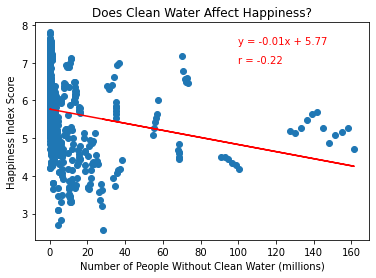

In [63]:
(m, b, r, p, stderr) = linregress(merged_df["num ppl wo clean h20"], merged_df["Score"])
y_regress = m * merged_df["num ppl wo clean h20"] + b

# Make scatter diagram
plt.scatter(merged_df["num ppl wo clean h20"], merged_df["Score"])
plt.xlabel("Number of People Without Clean Water (millions)")
plt.ylabel("Happiness Index Score")
plt.title("Does Clean Water Affect Happiness?")

# Plot line of regression
plt.plot(merged_df["num ppl wo clean h20"], y_regress, color="red")
plt.annotate(f"y = {m:.2f}x + {b:.2f}", color="red", xy=(100, 7.5))
plt.annotate(f"r = {r:.2f}", color="red", xy=(100, 7.0))

# Display plot
plt.show()

In [69]:
#read percent access to safe water
pasw_df = pd.read_csv(fp4, header = [0])
pasw_df.head()

,Access to improved drinking water,Access to basic drinking water,Access to limited drinking water,Access to unimproved drinking water,No access to drinking water,Access to safely managed drinking water,Access to improved sanitation,Access to basic sanitation services,Access to limited sanitation services,Access to unimproved sanitation facilities,...,wat_bas_without,wat_sm_without,san_imp_number_without,san_bas_number_without,san_sm_number_without,san_imp_without,san_bas_without,san_sm_without,hyg_bas_number_without,hyg_bas_without
0,31.832053,28.171415,3.660638,43.178306,24.989641,10.927531,27.519330,21.870802,5.648528,46.677563,...,71.828585,89.072469,1.506145e+07,1.623521e+07,NaN,72.480670,78.129198,NaN,NaN,NaN
1,31.860908,28.199366,3.661542,43.167542,24.971550,10.938792,27.540187,21.881304,5.658883,46.679234,...,71.800634,89.061208,1.565639e+07,1.687910e+07,NaN,72.459813,78.118696,NaN,NaN,NaN
2,34.185857,30.236385,3.949472,41.689620,24.124524,11.725373,29.272919,23.274193,5.998726,45.744225,...,69.763615,88.274627,1.598487e+07,1.734063e+07,NaN,70.727081,76.725807,NaN,NaN,NaN
3,36.510876,32.273722,4.237154,40.210931,23.278193,12.512121,31.006929,24.667435,6.339494,44.807082,...,67.726278,87.487879,1.633816e+07,1.783941e+07,NaN,68.993071,75.332565,NaN,NaN,NaN
4,38.853473,34.328559,4.524914,38.724280,22.422247,13.305995,32.755972,26.067695,6.688277,43.866901,...,65.671441,86.694005,1.662722e+07,1.828101e+07,NaN,67.244028,73.932305,NaN,NaN,NaN


In [71]:
for col in pasw_df.columns:
    print(col)

Access to improved drinking water
Access to basic drinking water
Access to limited drinking water
Access to unimproved drinking water
No access to drinking water
Access to safely managed drinking water
Access to improved sanitation
Access to basic sanitation services
Access to limited sanitation services
Access to unimproved sanitation facilities
Open defecation (no sanitation facilities)
Access to safely managed sanitation
Access to basic handwashing facilities
Access to limited handwashing facilities
No handwashing facilities
Number with access to improved drinking water
Number with access to basic drinking water
Number with access to limited drinking water
Number with access to unimproved drinking water
Number with no access to drinking water
Number with access to safely managed drinking water
Number with access to improved sanitation
Number with access to basic sanitation services
Number with access to limited sanitation services
Number with access to unimproved sanitation faciliti

In [79]:
c = [
    'Entity',
    'Year',
    'Access to improved drinking water', 
    'Access to basic drinking water',
    'Access to limited drinking water',
    'Access to unimproved drinking water',
    'No access to drinking water',
    'Access to safely managed drinking water',
    'Access to improved sanitation',
    'Access to basic sanitation services',
    'Access to limited sanitation services',
    'Access to unimproved sanitation facilities',
    'Open defecation (no sanitation facilities)'
]

pasw_df = pasw_df[c]
pasw_df = pasw_df.rename(columns={'Entity':'Country'})
pasw_df.head()


,Country,Year,Access to improved drinking water,Access to basic drinking water,Access to limited drinking water,Access to unimproved drinking water,No access to drinking water,Access to safely managed drinking water,Access to improved sanitation,Access to basic sanitation services,Access to limited sanitation services,Access to unimproved sanitation facilities,Open defecation (no sanitation facilities)
0,Afghanistan,2000,31.832053,28.171415,3.660638,43.178306,24.989641,10.927531,27.519330,21.870802,5.648528,46.677563,25.803107
1,Afghanistan,2001,31.860908,28.199366,3.661542,43.167542,24.971550,10.938792,27.540187,21.881304,5.658883,46.679234,25.780579
2,Afghanistan,2002,34.185857,30.236385,3.949472,41.689620,24.124524,11.725373,29.272919,23.274193,5.998726,45.744225,24.982856
3,Afghanistan,2003,36.510876,32.273722,4.237154,40.210931,23.278193,12.512121,31.006929,24.667435,6.339494,44.807082,24.185989
4,Afghanistan,2004,38.853473,34.328559,4.524914,38.724280,22.422247,13.305995,32.755972,26.067695,6.688277,43.866901,23.377127


In [100]:
merged_df2 = pd.merge(whi_df, pasw_df, on=["Country", "Year"], how="left")
merged_df.dropna(inplace = True)

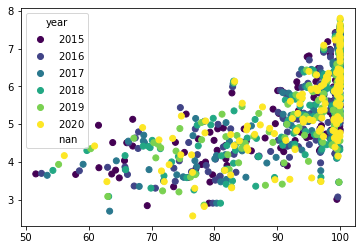

In [122]:
fig, ax = plt.subplots()

b = plt.scatter(merged_df2["Access to improved drinking water"], merged_df2["Score"],c=merged_df2['Year'])
legend = ax.legend(*b.legend_elements(), loc ='upper left',title ='year')

plt.show()

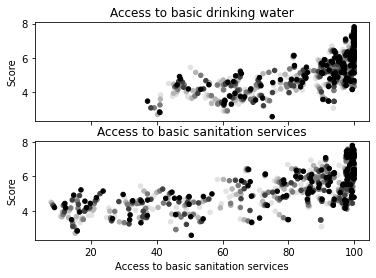

In [108]:
a = [ 
    'Access to basic drinking water',
    'Access to basic sanitation services',
]

colnames = a
fig, axes = plt.subplots(nrows=len(colnames), sharex = True)

for i, ax in enumerate(axes):
    merged_df2.plot(x=colnames[i], y="Score", kind = 'scatter', legend=False, 
                          ax=ax, c=merged_df2['Year'])
    ax.set_title(colnames[i])

plt.show()